### Sampling site directional data

In [6]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite.smpsite as smp

,sample_site,declination,inclination,is_outlier
0,0,105.965355,54.006125,0
1,0,101.882953,51.021415,0
2,0,101.630840,51.062236,0
3,0,100.389277,45.617901,0
4,0,105.142213,50.650468,0
...,...,...,...,...
65,6,147.326354,23.770219,0
66,6,148.094152,29.651238,0
67,6,153.583369,26.497572,0
68,6,153.629929,28.007678,0


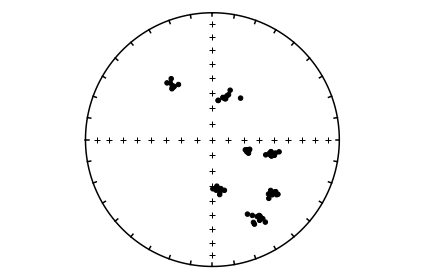

In [4]:
params0 = smp.Params(kappa_vgp=1000,
                     kappa_secular=2,
                     outlier_rate=0.0,
                     N_per_site=10,
                     N=70,
                     site_lat=5.0, 
                     site_long=0.0)

df_sample = smp.generate_samples(params0)
display(df_sample)

ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.declination.values, inc=df_sample.inclination.values)

In [8]:
smp.kappa2angular(100)

array(8.27912161967408)